In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [58]:
data = pd.read_json('./Sarcasm Data/Sarcasm_Headlines_Dataset.json',lines = True)

In [59]:
df = data.drop('article_link', axis = 1)

In [60]:
counts = df['is_sarcastic'].value_counts().reset_index()
counts.columns = ['is_sarcastic', 'count']
print(counts)

   is_sarcastic  count
0             0  14985
1             1  11724


# Preprocessing

In [61]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
nlp = spacy.load('en_core_web_sm')

In [63]:
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [64]:
# cleaned_text = []
# for text in df.headline:
#     processedtext = preprocess(text)
#     cleaned_text.append(processedtext)


In [65]:
# with open('cleaned_text.pkl', 'wb') as file:
#     pickle.dump(cleaned_text, file)

In [66]:
with open('cleaned_text.pkl', 'rb') as file:
    loaded_cleaned_text = pickle.load(file)

In [67]:
df['clean_text'] = loaded_cleaned_text
df.head()

,headline,is_sarcastic,clean_text
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sue secret black co...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood w...
2,mom starting to fear son's web series closest ...,1,mom start fear son web series close thing gran...
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,rowling wish snape happy birthday magical way


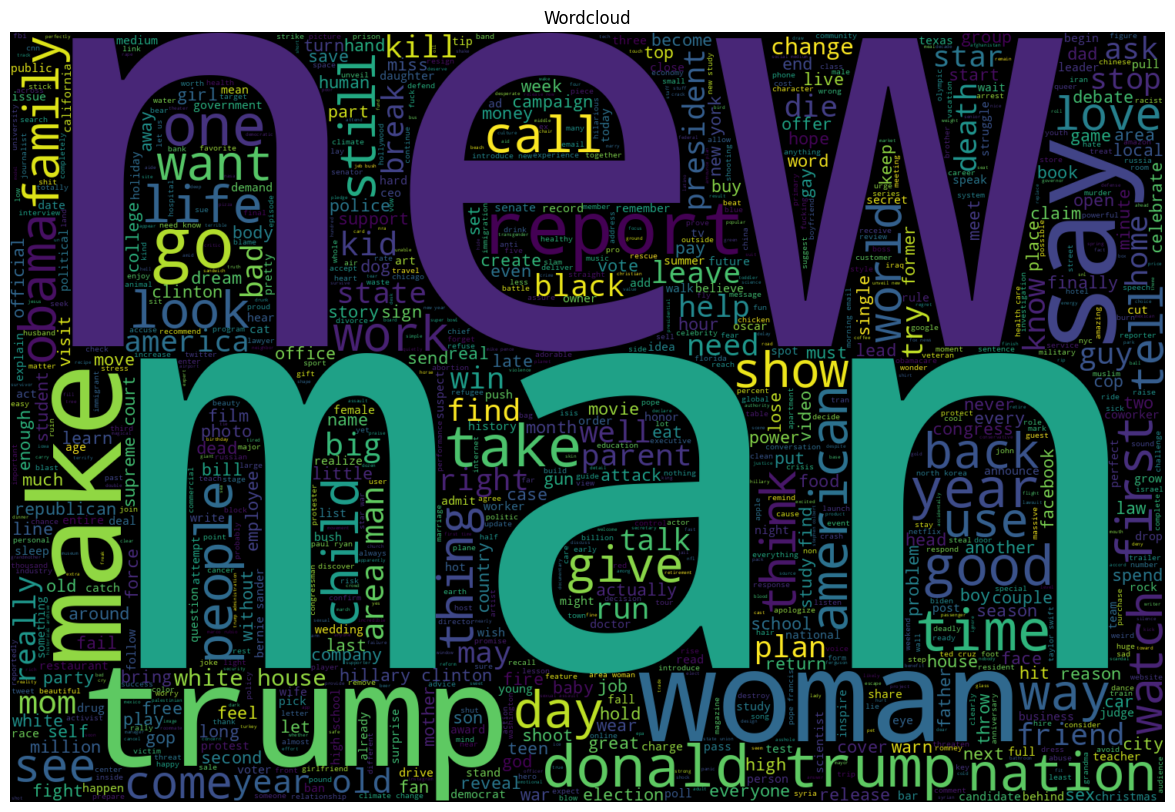

In [68]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

# Model Building

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
X = df.clean_text
y = df.is_sarcastic

In [71]:
def train_model(model, data, targets):
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

In [72]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [74]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

## Logistic Regression

In [75]:
# ## Train for the first time

# lr = LogisticRegression(class_weight = 'balanced')
# lr.fit(X_tfidf_train, y_train)

In [76]:
# ## Save the model as pickle file

# with open('LogisticRegression.pkl', 'wb') as file:
#     pickle.dump(lr, file)

In [77]:
# Load the model from pickle file

with open('LogisticRegression.pkl', 'rb') as file:
    loaded_lr = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [78]:
y_pred_lr = loaded_lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[3598  885]
 [ 862 2668]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4483
           1       0.75      0.76      0.75      3530

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013

Accuracy :  0.7819792836640459
Precison :  0.781845008821491
Recall :  0.7819792836640459
F1 :  0.7819056615855512


## Naive Bayes

In [79]:
# ## Train for the first time

# clf_nb = MultinomialNB()
# clf_nb.fit(X_tfidf_train,y_train)

In [80]:
# ## Save the model as pickle file

# with open('MultinomialNB.pkl', 'wb') as file:
#     pickle.dump(clf_nb, file)

In [81]:
# Load the model from pickle file

with open('MultinomialNB.pkl', 'rb') as file:
    loaded_mnb = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [82]:
y_pred_nb = loaded_mnb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[4251  232]
 [1686 1844]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82      4483
           1       0.89      0.52      0.66      3530

    accuracy                           0.76      8013
   macro avg       0.80      0.74      0.74      8013
weighted avg       0.79      0.76      0.75      8013

Accuracy :  0.7606389616872582
Precison :  0.8379151399050805
Recall :  0.7606389616872582
F1 :  0.7749797539413773


## Linear SVC

In [83]:
# linearsvc =  LinearSVC(C= 10,random_state=0,class_weight='balanced')
# linearsvc.fit(X_tfidf_train,y_train)

In [84]:
# with open('LinearSVC.pkl', 'wb') as file:
#     pickle.dump(linearsvc, file)

In [85]:
with open('LinearSVC.pkl', 'rb') as file:
    loaded_lsvc = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [86]:
y_pred_linearsvc = loaded_lsvc.predict(X_tfidf_test)
print_metrices(y_pred_linearsvc,y_test)

[[3713  770]
 [ 828 2702]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4483
           1       0.78      0.77      0.77      3530

    accuracy                           0.80      8013
   macro avg       0.80      0.80      0.80      8013
weighted avg       0.80      0.80      0.80      8013

Accuracy :  0.8005740671408961
Precison :  0.8010286351694653
Recall :  0.8005740671408961
F1 :  0.8007591386593901


## SVC

In [87]:
# svc = train_model(SVC(C= 10,random_state=0,class_weight='balanced'), X_train,y_train)

In [88]:
# with open('SVC.pkl', 'wb') as file:
#     pickle.dump(svc, file)

In [89]:
with open('SVC.pkl', 'rb') as file:
    loaded_svc = pickle.load(file)

In [92]:
y_pred_svc=loaded_svc.predict(X_test)
print_metrices(y_pred_svc,y_test)

[[3840  643]
 [ 999 2531]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      4483
           1       0.80      0.72      0.76      3530

    accuracy                           0.80      8013
   macro avg       0.80      0.79      0.79      8013
weighted avg       0.80      0.80      0.79      8013

Accuracy :  0.7950829901410208
Precison :  0.8012838719141163
Recall :  0.7950829901410208
F1 :  0.7966109943493518


# Evaluation

In [93]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),
    'Linear SVC' : accuracy_score(y_pred_linearsvc,y_test),
    'SVC' : accuracy_score(y_pred_svc,y_test)
}

In [94]:
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])

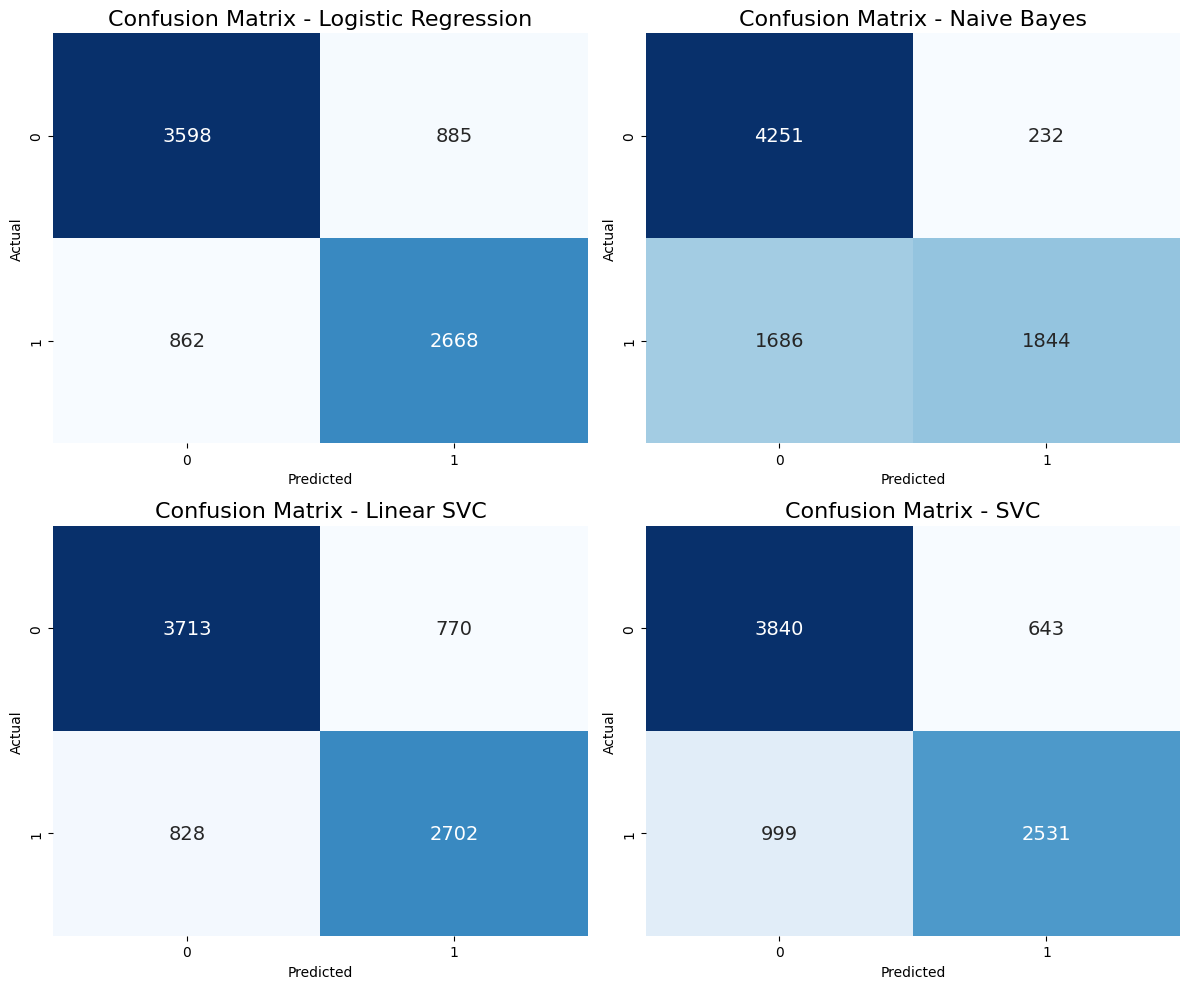

In [95]:
models = ['Logistic Regression', 'Naive Bayes', 'Linear SVC', 'SVC']
confusion_matrices = [confusion_matrix(y_test, y_pred_lr),
                      confusion_matrix(y_test, y_pred_nb),
                      confusion_matrix(y_test, y_pred_linearsvc),
                      confusion_matrix(y_test, y_pred_svc)]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (model, cm) in enumerate(zip(models, confusion_matrices)):
    ax = axes[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14},
                xticklabels=df.is_sarcastic.unique(), yticklabels=df.is_sarcastic.unique(), ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model}', fontsize=16)

plt.tight_layout()
plt.show()

In [96]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Linear SVC', 'SVC'],
    'Accuracy': [accuracy_score(y_pred_lr,y_test).round(4), accuracy_score(y_pred_nb,y_test).round(4) , accuracy_score(y_pred_linearsvc,y_test).round(4), accuracy_score(y_pred_svc,y_test).round(4)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Linear SVC,0.8006
1,SVC,0.7951
2,Logistic Regression,0.7820
3,Naive Bayes,0.7606


In [97]:
text_samples = [
    'Feeling joyous, filled with happiness inside.',
    'Terrified, trembling in fear of the unknown.',
    'Heartbroken, lost in a sea of despair.',
    'Consumed by rage, boiling with anger.',
    "I stopped feeling cold and began feeling hotter.",
    'Surprised by events, shock coursing through.',
    'Deep relaxation, serenity envelops my being.',
    'Exhilaration runs high, excitement overflows.',
    'Boredom creeps in, a dull, listless state.',
    'Lifeless and still, devoid of sensation.',
    "Mihir's code is so bad, it makes me cry.",
    " want each of you to feel my gentle embrace",
]

predictions = loaded_svc.predict(text_samples)
predictions = list(map(bool, predictions))
data = {'Text': text_samples, 'isSarcastic': predictions}
df = pd.DataFrame(data)
print(df)

                                                Text  isSarcastic
0      Feeling joyous, filled with happiness inside.        False
1       Terrified, trembling in fear of the unknown.         True
2             Heartbroken, lost in a sea of despair.        False
3              Consumed by rage, boiling with anger.        False
4   I stopped feeling cold and began feeling hotter.         True
5       Surprised by events, shock coursing through.         True
6       Deep relaxation, serenity envelops my being.         True
7      Exhilaration runs high, excitement overflows.        False
8         Boredom creeps in, a dull, listless state.        False
9           Lifeless and still, devoid of sensation.        False
10          Mihir's code is so bad, it makes me cry.         True
11        want each of you to feel my gentle embrace        False
